In [1]:
import os
import pandas as pd
import seaborn as sns
import tempfile
from qiime2 import Artifact
from qiime2.metadata import Metadata
from qiime2.plugins.feature_classifier.methods import classify_consensus_vsearch
from qiime2.plugins.taxa.visualizers import barplot
from qiime2 import Visualization
from scipy import stats

%matplotlib inline

In [11]:
working_dir = os.path.abspath('../')
refs_dir = working_dir + '/taxonomy_references'
#metadata = Metadata.load(working_dir + '/input/qiime2/barcode_file.tsv')
references = ['silva', 'silva_extended', 'gg', 'gg_extended']
methods = ['dada2', 'deblur']#, 'unoise3']
denoisers = ['dada2', 'deblur']
classifiers = ['vsearch', 'nb']

In [4]:
working_dir

'/mnt/c/Users/Dylan/Documents/zaneveld'

In [15]:
df = pd.read_csv((working_dir + '/study_proportions/peru_ants_proportions.csv'), index_col = 0)
statistics = []
for denoiser in denoisers:
    for level in ['unassigned', 'chloroplasts', 'mitochondria']:
        for classifier in classifiers:
            for base_reference in ['silva', 'gg']:
                base_absolute = sum(df['absolute ' + level][(df['reference taxonomy'] == base_reference) & (df['denoise method'] == denoiser)])
                extended_absolute = sum(df['absolute ' + level][(df['reference taxonomy'] == (base_reference + '_extended')) & (df['denoise method'] == denoiser)])
                if not base_absolute == 0:
                    fold_delta = extended_absolute / base_absolute
                else:
                    folde_delta = 'NaN'
                base_proportion = df['proportion ' + level][(df['reference taxonomy'] == base_reference) & (df['denoise method'] == denoiser)]
                extended_proportion = df['proportion ' + level][(df['denoise method'] == denoiser) & (df['reference taxonomy'] == (base_reference + '_extended'))]
                try:
                    H, p = stats.kruskal(base_proportion, extended_proportion)
                except ValueError:
                    H, p = 'NaN', 'NaN'
                statistics.append((denoiser, classifier, level, base_reference, fold_delta, H, p))
stats_df = pd.DataFrame(statistics, columns = ['denoiser', 'classifier', 'level', 'base reference', 'extended/base counts', 'H', 'p'])
stats_df.to_csv(working_dir + '/study_proportions/peru_ants_stats.csv')
stats_df

/home/dylan/miniconda3/envs/qiime2-2021.4/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (11,12,13,14,15,16,17,18,20,21,22,23,26,28,29,30,31,32,33,34,35,36,37,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,denoiser,classifier,level,base reference,extended/base counts,H,p
0,dada2,vsearch,unassigned,silva,0.357237,NaN,NaN
1,dada2,vsearch,unassigned,gg,0.420892,NaN,NaN
2,dada2,nb,unassigned,silva,0.357237,NaN,NaN
3,dada2,nb,unassigned,gg,0.420892,NaN,NaN
4,dada2,vsearch,chloroplasts,silva,1.003427,NaN,NaN
5,dada2,vsearch,chloroplasts,gg,1.165007,NaN,NaN
6,dada2,nb,chloroplasts,silva,1.003427,NaN,NaN
7,dada2,nb,chloroplasts,gg,1.165007,NaN,NaN
8,dada2,vsearch,mitochondria,silva,24.522005,NaN,NaN
9,dada2,vsearch,mitochondria,gg,17.720798,NaN,NaN


In [48]:
sns.set_style("dark")
sns.set_context("poster")
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [58]:
dada2_df = df[df['denoise method'] == 'dada2']
deblur_df = df[df['denoise method'] == 'deblur']

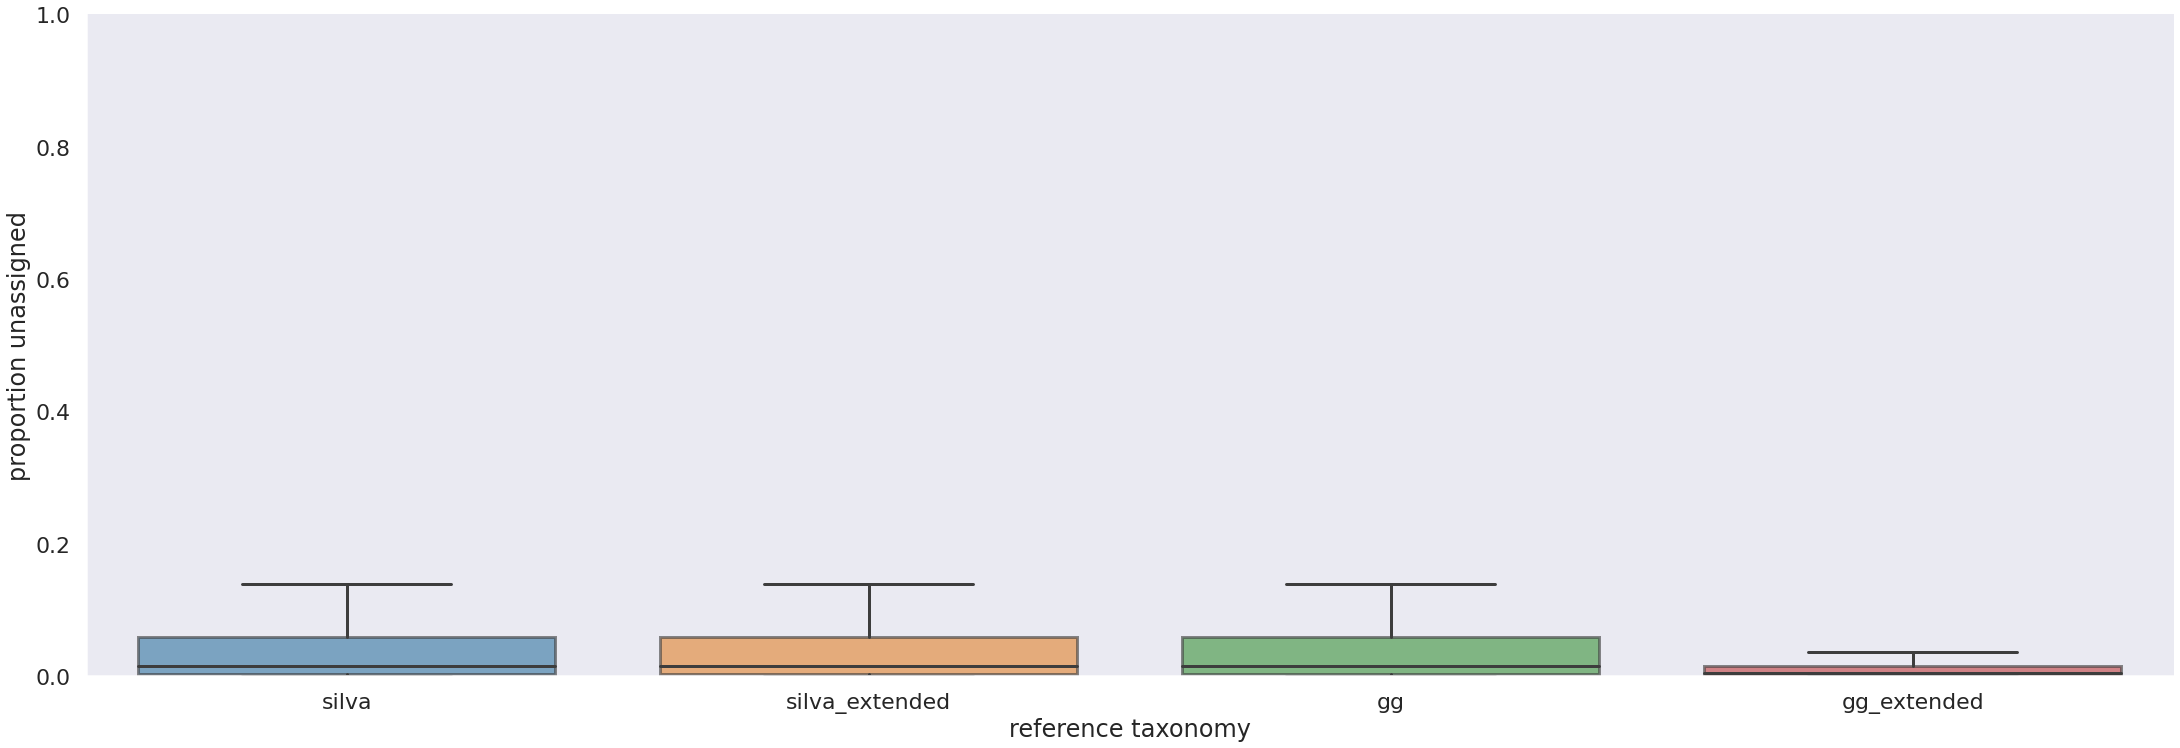

In [59]:
g = sns.catplot(boxprops = dict(alpha = .6), height = 10, aspect = 3,
                x = "reference taxonomy", y = "proportion unassigned",
                kind = "box", data = dada2_df, fliersize = 0)
g.set(ylim = (0, 1))

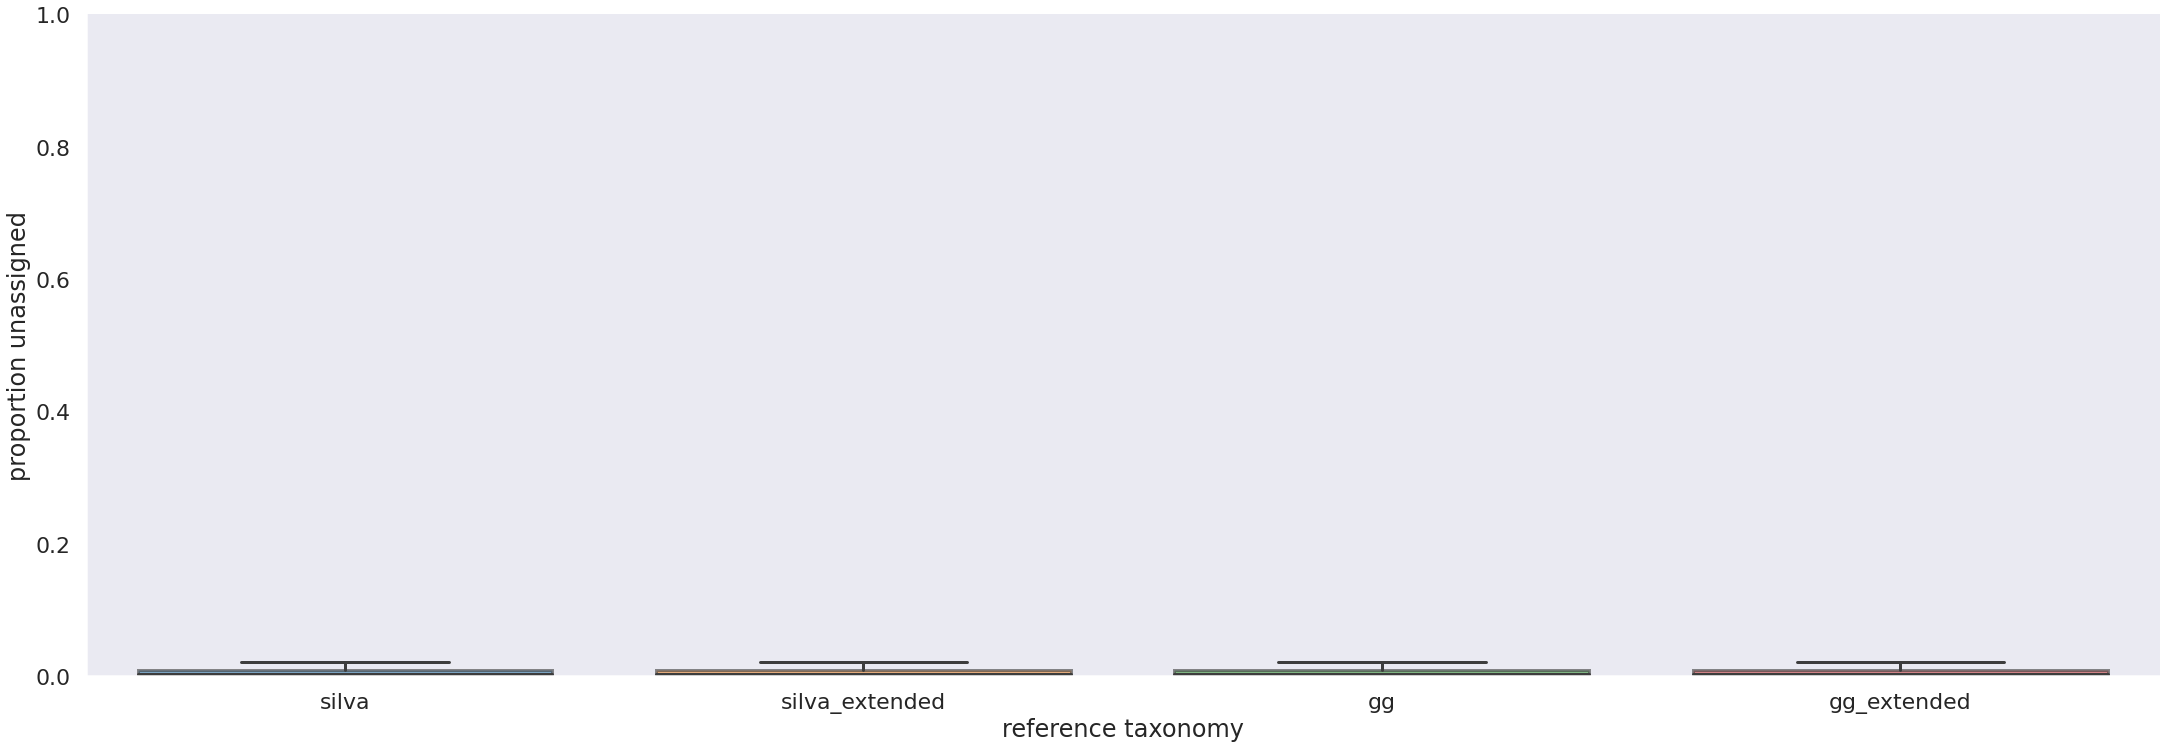

In [60]:
h = sns.catplot(boxprops = dict(alpha = .6), height = 10, aspect = 3,
                x = "reference taxonomy", y = "proportion unassigned",
                kind = "box", data = deblur_df, fliersize = 0)
h.set(ylim = (0, 1))

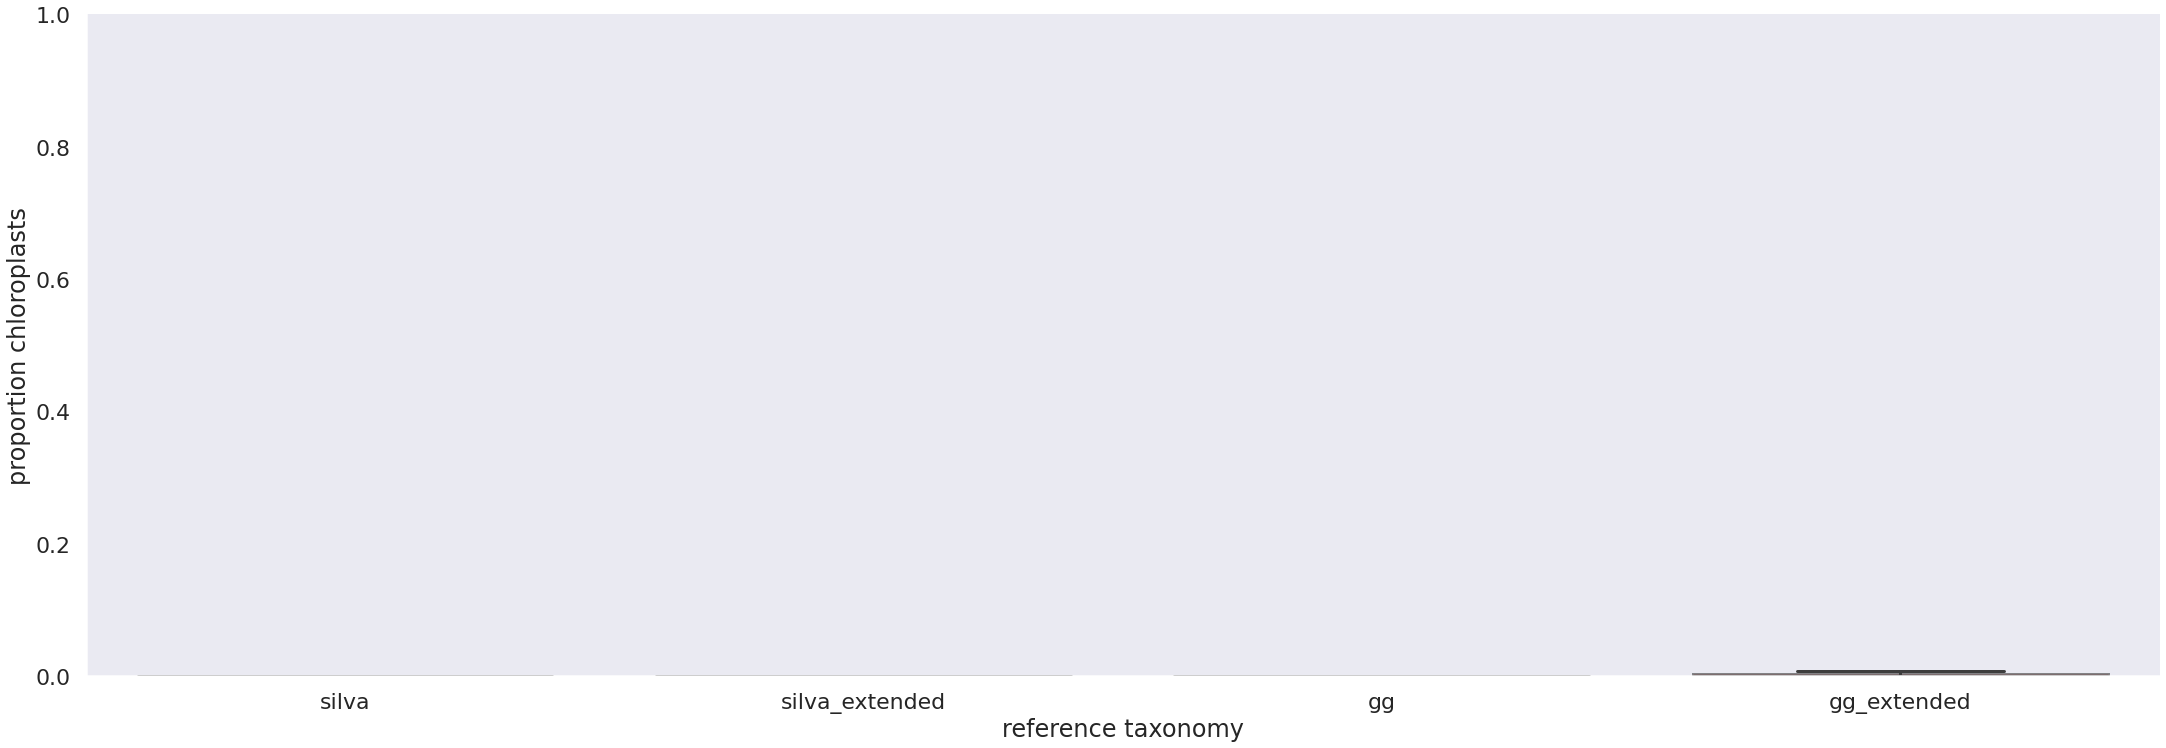

In [61]:
i = sns.catplot(boxprops = dict(alpha = .6), height = 10, aspect = 3,
                x = "reference taxonomy", y = "proportion chloroplasts",
                kind = "box", data = dada2_df, fliersize = 0)
i.set(ylim = (0, 1))

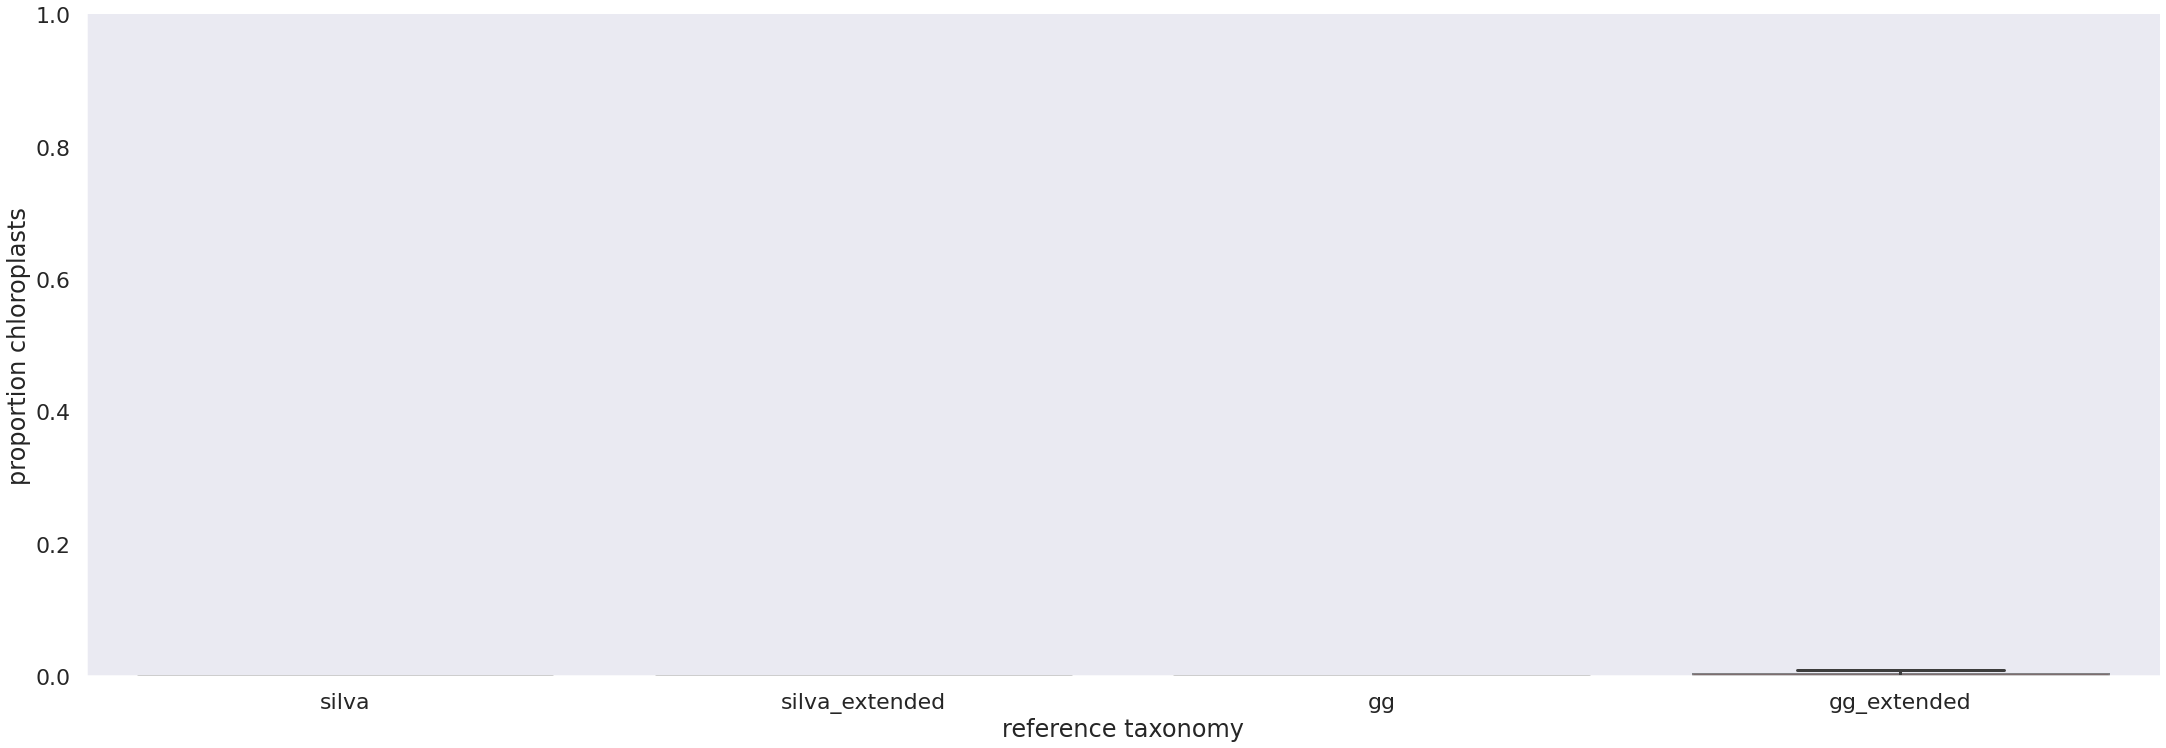

In [62]:
j = sns.catplot(boxprops = dict(alpha = .6), height = 10, aspect = 3,
                x = "reference taxonomy", y = "proportion chloroplasts",
                kind = "box", data = deblur_df, fliersize = 0)
j.set(ylim = (0, 1))

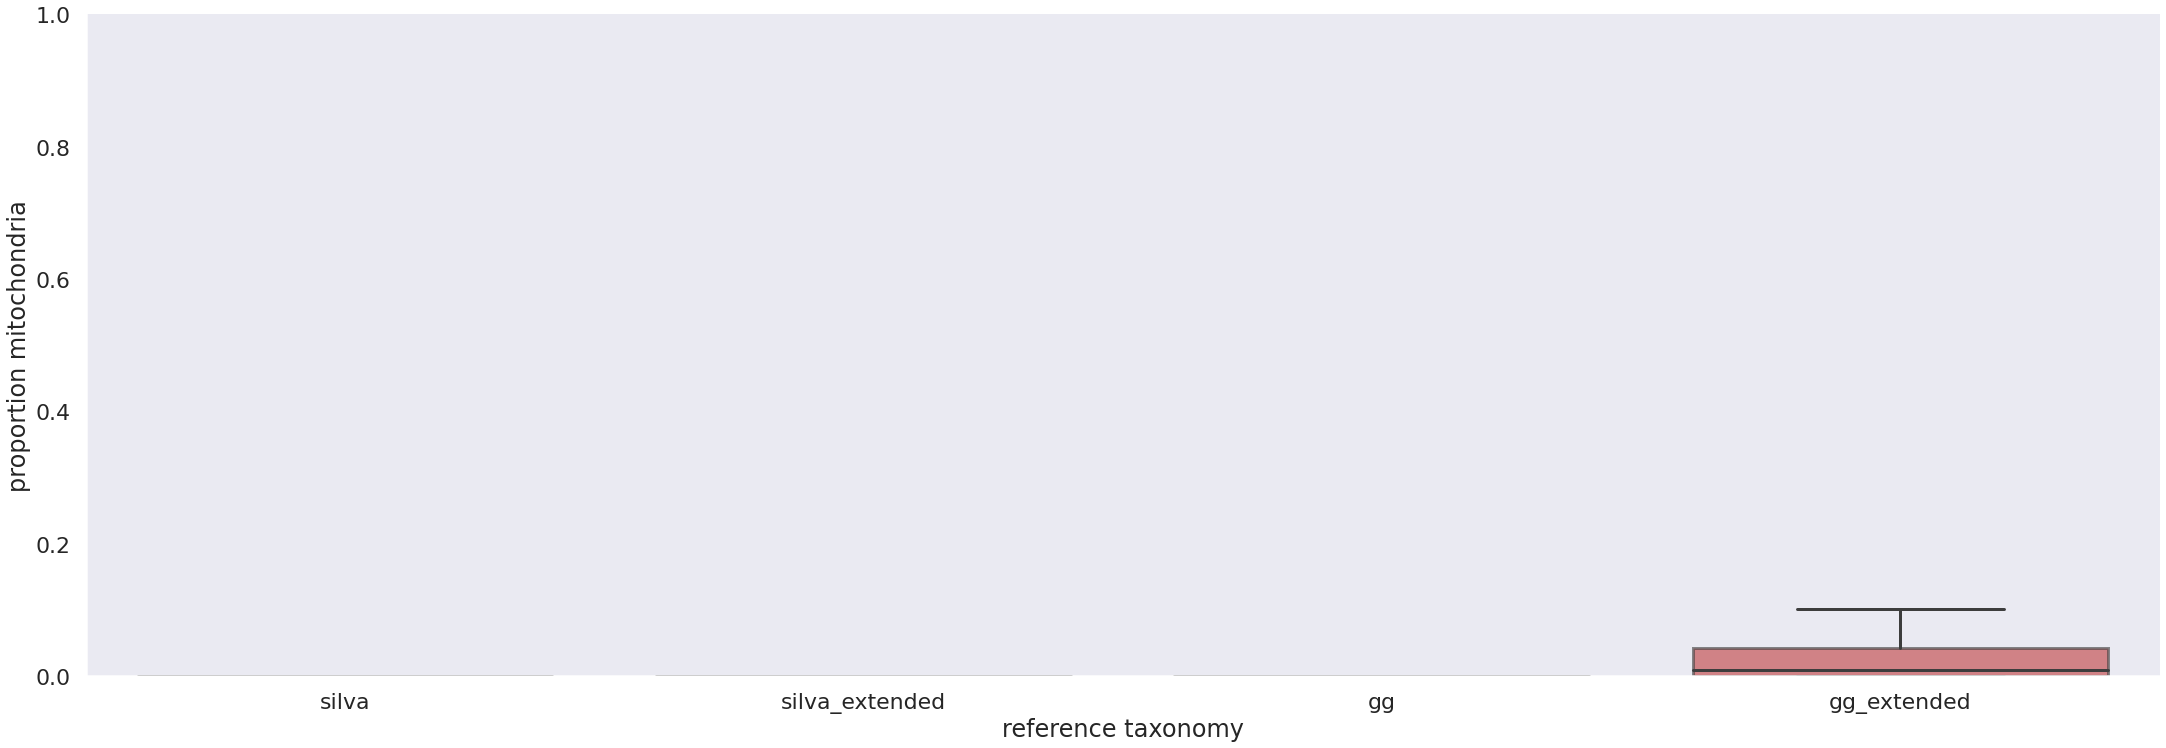

In [63]:
k = sns.catplot(boxprops = dict(alpha = .6), height = 10, aspect = 3,
                x = "reference taxonomy", y = "proportion mitochondria",
                kind = "box", data = dada2_df, fliersize = 0)
k.set(ylim = (0, 1))

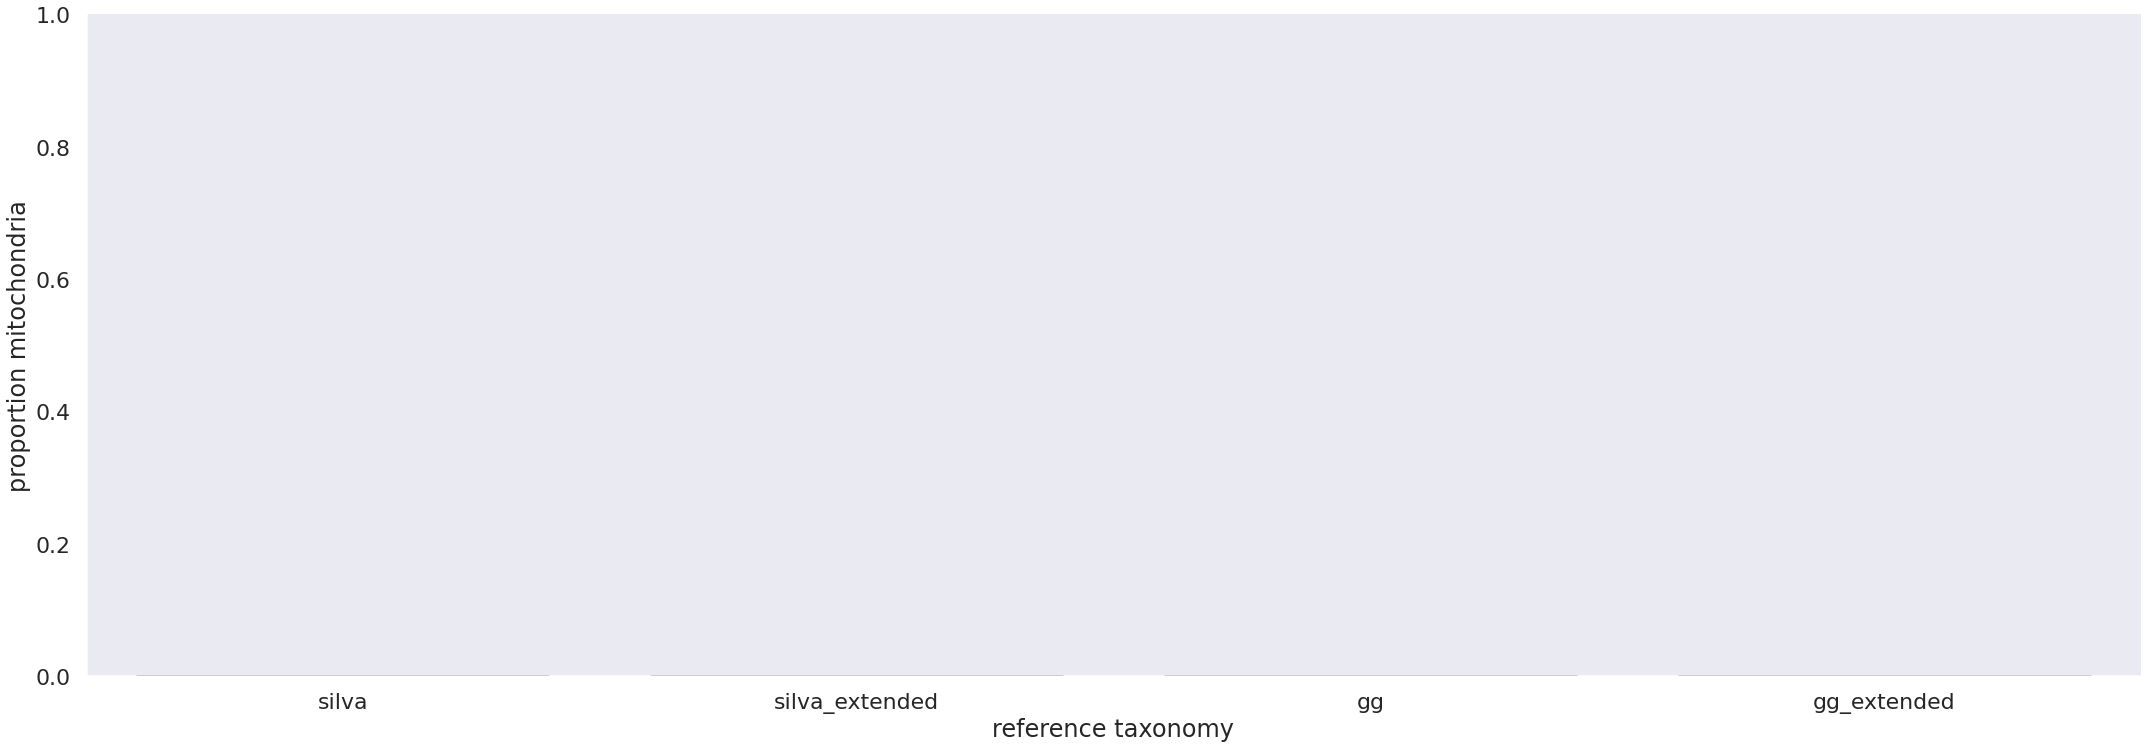

In [64]:
l = sns.catplot(boxprops = dict(alpha = .6), height = 10, aspect = 3,
                x = "reference taxonomy", y = "proportion mitochondria",
                kind = "box", data = deblur_df, fliersize = 0)
l.set(ylim = (0, 1))